In [60]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
import pandas as pd
from azure.ai.ml.entities import Environment
from azure.ai.ml import command
import mlflow
from azure.ai.ml import Input, Output
from azure.ai.ml.constants import AssetTypes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definiendo autenticacion, debes poner tus credenciales en las variables
credential = DefaultAzureCredential()
ml_client = MLClient(
    credential=credential,
    subscription_id="a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51",
    resource_group_name="brazilian-ecommerce-sentiment-analysis",
    workspace_name="sentiment-analysis"
)

In [4]:
asset_reviews = ml_client.data.get("olist_order_reviews", version="1")
asset_orders_full = ml_client.data.get('orders_full_imputed', version='1')
order_reviews = pd.read_csv(asset_reviews.path)
orders_full_imputed = pd.read_csv(asset_orders_full.path)
orders_full_imputed

Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented


,review_score,item_price_mean,freight_value_mean,total_payment,n_items,unique_items,unique_sellers,payment_type,product_category,product_weight_g_sum,...,delivery_delay_days,purchase_month,shipping_delay_days,seller_lat,seller_lng,customer_lat,customer_lng,lat_diff,lng_diff,geo_diff
0,5,58.90,13.29,72.19,1,1,1,credit_card,cool_stuff,650,...,-9,9,0,-22.496953,-44.127492,-21.762775,-41.309633,-0.734177,-2.817859,2.911932
1,4,239.90,19.93,259.83,1,1,1,credit_card,pet_shop,30000,...,-3,4,1,-23.565096,-46.518565,-20.220527,-50.903424,-3.344569,4.384859,5.514810
2,5,199.00,17.87,216.87,1,1,1,credit_card,furniture_decor,3050,...,-14,1,-3,-22.262584,-46.171124,-19.870305,-44.593326,-2.392279,-1.577798,2.865737
3,4,12.99,12.79,25.78,1,1,1,credit_card,perfumery,200,...,-6,8,-5,-20.553624,-47.387359,-23.089925,-46.611654,2.536302,-0.775705,2.652271
4,5,199.90,18.14,218.04,1,1,1,credit_card,garden_tools,3750,...,-16,2,2,-22.929384,-53.135873,-23.243402,-46.827614,0.314018,-6.308258,6.316069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98668,5,299.99,43.41,343.40,1,1,1,boleto,housewares,10150,...,-8,4,-7,-26.912574,-48.673980,-2.497993,-44.297761,-24.414581,-4.376219,24.803690
98669,5,350.00,36.53,386.53,1,1,1,boleto,computers_accessories,8950,...,-9,7,-3,-23.535864,-46.642819,-25.566904,-49.309115,2.031041,2.666296,3.351755
98670,5,99.90,16.95,116.85,1,1,1,credit_card,sports_leisure,967,...,-13,10,-5,-25.469955,-49.289821,-23.597794,-46.643923,-1.872161,-2.645898,3.241260
98671,5,55.99,8.72,64.71,1,1,1,credit_card,computers_accessories,100,...,-9,8,-6,-23.635530,-46.694031,-23.040252,-46.979782,-0.595278,0.285751,0.660310


In [28]:
envs = ml_client.environments.list()
for env in envs:
    print(env.name)

sentiment-analysis-env3
sentiment-analysis-env2
sentiment_analysis_env
AzureML-ACPT-pytorch-1.13-py38-cuda11.7-gpu


In [55]:
my_env = Environment(
    name="sentiment-analysis-env3",
    description="Environment for sentiment analysis deployment",
    conda_file="./zunkuaz/src/sentiment-analysis-env.yml",
    image="mcr.microsoft.com/azureml/curated/minimal-py311-inference:36",
    version='15'
)
#ml_client.environments.create_or_update(my_env)

In [21]:
env = ml_client.environments.get(name='sentiment-analysis-env3', version="14")
print(env)

conda_file:
  channels:
  - defaults
  dependencies:
  - python=3.11
  - pip
  - pip:
    - scikit-learn
    - pandas
    - numpy
    - nltk
    - joblib
    - azureml-mlflow
    - matplotlib
  name: sentiment-analysis-env3
creation_context:
  created_at: '2025-10-24T22:49:12.192621+00:00'
  created_by: Daniel Mendez
  created_by_type: User
  last_modified_at: '2025-10-24T22:49:12.192621+00:00'
  last_modified_by: Daniel Mendez
  last_modified_by_type: User
description: Environment for sentiment analysis deployment
id: azureml:/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourceGroups/brazilian-ecommerce-sentiment-analysis/providers/Microsoft.MachineLearningServices/workspaces/sentiment-analysis/environments/sentiment-analysis-env3/versions/14
image: mcr.microsoft.com/azureml/curated/minimal-py311-inference:36
name: sentiment-analysis-env3
os_type: linux
tags: {}
version: '14'



In [29]:
# Crenado un MLflow experiment, te permite agrupar tus ejecuciones.
mlflow.set_experiment(experiment_name="sentiment_analysis")

2025/10/09 23:29:38 INFO mlflow.tracking.fluent: Experiment with name 'sentiment_analysis' does not exist. Creating a new experiment.


<Experiment: artifact_location='', creation_time=1760052578867, experiment_id='5d0ada56-50ca-460a-8988-9687bb3ea741', last_update_time=None, lifecycle_stage='active', name='sentiment_analysis', tags={}>

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

with mlflow.start_run():
    model = LogisticRegression(C=10, penalty='l1',class_weight='balanced',random_state=42,solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)

    mlflow.log_metric('accuracy',accuracy)

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [18]:
from azure.ai.ml import Input, Output

sentiment_classifier_job = command(
    code='./zunkuaz',
    command='python src/prep-data.py --input_data ${{inputs.training_data}} --output_folder ${{outputs.clean_data}}',
    inputs={
        'training_data': Input(type='uri_file', path='azureml://subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourcegroups/brazilian-ecommerce-sentiment-analysis/workspaces/sentiment-analysis/datastores/workspaceblobstore/paths/UI/2025-10-09_220232_UTC/olist_order_reviews_dataset.csv')
    },
    outputs={
        'clean_data': Output(type=AssetTypes.URI_FOLDER),
    },
    environment='sentiment-analysis-env3:11',
    compute='zunku-comp-instance',
    experiment_name='sentiment_analysis'
)

returned_job = ml_client.create_or_update(sentiment_classifier_job)

Uploading zunkuaz (0.11 MBs): 100%|██████████| 108103/108103 [00:00<00:00, 2289024.53it/s]


pathOnCompute is not a known attribute of class <class 'azure.ai.ml._restclient.v2023_04_01_preview.models._models_py3.UriFolderJobOutput'> and will be ignored


In [3]:
import os

# create a folder for the script files
script_folder = './zunkuaz/src'
os.makedirs(script_folder, exist_ok=True)
print(script_folder, 'folder created')

./zunkuaz/src folder created


In [74]:
%%writefile $script_folder/prep-data.py
import nltk
nltk.download('all')
import argparse
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.sparse import save_npz

import sys
sys.path.append(str(Path(__file__).resolve().parents[1]))
from utilities.custom_transformers import import_data, DropNullData, DropDuplicates
from utilities.text_utils import re_breakline, re_dates, re_hiperlinks, re_money, re_negation, re_numbers, \
    re_special_chars, re_whitespaces, ApplyRegex, StemmingProcess, StopWordsRemoval
from utilities.text_prep import text_transformers
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

"""
-----------------------------------
------ 0. PROJECT VARIABLES -------
-----------------------------------
"""

# Variables for reading the data
FILENAME = 'olist_order_reviews_dataset.csv'
COLS_READ = ['review_comment_message', 'review_score']
CORPUS_COL = 'review_comment_message'
TARGET_COL = 'target'

# Defining stopwords
PT_STOPWORDS = stopwords.words('portuguese')

"""
This python script will allocate all the custom transformers that are specific for the project task.
The idea is to encapsulate the classes and functions used on pipelines to make codes cleaner.

"""

"""
-----------------------------------
----- 1. CUSTOM TRANSFORMERS ------
           1.1 Classes
-----------------------------------
"""


class ColumnMapping(BaseEstimator, TransformerMixin):
    """
    This class applies the map() function into a DataFrame for transforming a columns given a mapping dictionary

    Parameters
    ----------
    :param old_col_name: name of the columns where mapping will be applied [type: string]
    :param mapping_dict: python dictionary with key/value mapping [type: dict]
    :param new_col_name: name of the new column resulted by mapping [type: string, default: 'target]
    :param drop: flag that guides the dropping of the old_target_name column [type: bool, default: True]

    Returns
    -------
    :return X: pandas DataFrame object after mapping application [type: pd.DataFrame]

    Application
    -----------
    # Transforming a DataFrame column given a mapping dictionary
    mapper = ColumnMapping(old_col_name='col_1', mapping_dict=dictionary, new_col_name='col_2', drop=True)
    df_mapped = mapper.fit_transform(df)
    """

    def __init__(self, old_col_name, mapping_dict, new_col_name='target', drop=True):
        self.old_col_name = old_col_name
        self.mapping_dict = mapping_dict
        self.new_col_name = new_col_name
        self.drop = drop

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Applying mapping
        X[self.new_col_name] = X[self.old_col_name].map(self.mapping_dict)

        # Dropping the old columns (if applicable)
        if self.drop:
            X.drop(self.old_col_name, axis=1, inplace=True)

        return X

def main(args):
    # Read data
    df = get_data(args.input_data)

    X, X_prep, y = clean_data(df)

    # Crea la carpeta si no existe
    output_folder = args.output_folder
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    save_npz(Path(output_folder) / 'vectorized_comments.npz', X_prep)
    # X_prep.tocsc((Path(output_folder) / 'vectorized_comments.csc'))
    y.to_csv(Path(output_folder) / 'target.csv')
    X.to_csv(Path(output_folder) / 'comments.csv')

# Function that reads data
def get_data(path):
    df = pd.read_csv(path)

    row_count = (len(df))
    print(f'Preparing {row_count} rows of data'.format(row_count))
    return df

# Funtion that removes missing values, drop duplicates, apply text transformers, and maps the target (review_score) to positive/negative reviews
def clean_data(df):
    # Creating a dictionary for mapping the target column based on review score
    score_map = {
        1: 0,
        2: 0,
        3: 0,
        4: 1,
        5: 1
    }

    # Selecting columns
    df_prep = df[COLS_READ]
    # Creating a pipeline for the initial prep on the data
    initial_prep_pipeline = Pipeline([
        ('mapper', ColumnMapping(old_col_name='review_score', mapping_dict=score_map, new_col_name=TARGET_COL)),
        ('null_dropper', DropNullData()),
        ('dup_dropper', DropDuplicates())
    ])
    # Applying initial prep pipeline
    df_prep = initial_prep_pipeline.fit_transform(df_prep)

    # Applying text transformations
    X = df_prep[CORPUS_COL]
    text_list = df_prep[CORPUS_COL].to_list()
    text_pipeline = text_transformers()
    X_prep = text_pipeline.fit_transform(text_list)
    y = df_prep[TARGET_COL]
    print(X)
    return X, X_prep, y

    # Setup arg parser
def parse_args():
    parser = argparse.ArgumentParser()
    # Add arguments
    parser.add_argument('--input_data', dest='input_data', type=str)
    parser.add_argument('--output_folder', dest='output_folder', type=str)

    args = parser.parse_args()
    return args

# Run script
if __name__ == '__main__':
    # Add space in logs
    print('\n\n')
    print('*' * 60)

    # Parse args
    args = parse_args()

    # Run main function
    main(args)

    # add space in logs
    print("*" * 60)
    print("\n\n")

Overwriting ./zunkuaz/src/prep-data.py


In [76]:
from azure.ai.ml import load_component
from azure.ai.ml.entities import Component


parent_dir = './zunkuaz'
prep_data = load_component(source= parent_dir + '/src/prep-data.yaml')

ml_client.components.create_or_update(prep_data)

Uploading zunkuaz (0.09 MBs): 100%|██████████| 92824/92824 [00:00<00:00, 1787985.59it/s]




CommandComponent({'latest_version': None, 'intellectual_property': None, 'auto_increment_version': False, 'source': 'REMOTE.WORKSPACE.COMPONENT', 'is_anonymous': False, 'auto_delete_setting': None, 'name': 'prep_data', 'description': None, 'tags': {}, 'properties': {}, 'print_as_yaml': False, 'id': '/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourceGroups/brazilian-ecommerce-sentiment-analysis/providers/Microsoft.MachineLearningServices/workspaces/sentiment-analysis/components/prep_data/versions/2.8', 'Resource__source_path': None, 'base_path': '/mnt/batch/tasks/shared/LS_root/mounts/clusters/zunku-comp-instance/code/Users', 'creation_context': <azure.ai.ml._restclient.v2024_01_01_preview.models._models_py3.SystemData object at 0x745b2315e590>, 'serialize': <msrest.serialization.Serializer object at 0x745b25865240>, 'command': 'python src/prep-data.py --input_data ${{inputs.input_data}} --output_folder ${{outputs.output_data}}', 'code': '/subscriptions/a4fd359b-aa4a-4e0c-a8b2

In [66]:
%%writefile $script_folder/train-model.py

# import libraries
import mlflow
import argparse
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from scipy.sparse import load_npz
import os
#from mlflow.models.signature import infer_signature

from pathlib import Path
import sys
sys.path.append(str(Path(__file__).resolve().parents[1]))

def main(args):
    with mlflow.start_run():
        # read data
        X_prep, y = get_data_from_folder(args.training_data)

        # split data
        X_train, X_test, y_train, y_test = split_data(X_prep, y)

        # train model
        class_weight = None if args.class_weight == 'Nini' else args.class_weight
        model = train_model(class_weight, args.penalty, args.reg_rate, X_train, X_test, y_train, y_test)

        ########## NUEVOOO
        # create the signature by inferring it from the datasets
        #signature = infer_signature(X_prep, y)

        # manually log the model
        #mlflow.sklearn.log_model(model, artifact_path='model_output', signature=signature)

        # evaluate model
        eval_model(model, X_train, y_train, X_test, y_test)

# function that reads the data
def get_data_from_folder(folder_path):
    print("Reading data...")

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.startswith('comments'):
            X = pd.read_csv(file_path)
        elif file_name.startswith('target'):
            y = pd.read_csv(file_path)
        elif file_name.endswith('.npz'):
            X_prep = load_npz(file_path)

    return X_prep, y

# function that splits the data
def split_data(X_prep, y):
    print("Splitting data...")
    y = pd.Series(y['target'].values)
    X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.20, random_state=0)
    return X_train, X_test, y_train, y_test

# function that trains the model
def train_model(class_weight, penalty, reg_rate, X_train, X_test, y_train, y_test):
    mlflow.log_param("Regularization rate", reg_rate)
    mlflow.log_param('Class Weight', class_weight)
    mlflow.log_param('Penalty', penalty)
    print("Training model...")
    
    # Training model
    model = LogisticRegression(C=reg_rate, solver="liblinear", penalty=penalty, class_weight=class_weight).fit(X_train, y_train)

    # Log with MLFlow to compare metrics and easy registry
    mlflow.sklearn.log_model(model, artifact_path='model_output')

    # Localy save model to pass as an output to the next component in the pipeline
    mlflow.sklearn.save_model(model, path=args.model_output)
    return model

# function that evaluates the model
def eval_model(model, X_test, y_test, X_train, y_train):
    print('Evaluating model...')
    # Calculate performance
    # performance = trainer.evaluate_performance(X_train, y_train, X_test, y_test, cv=5, save=False)
    
    # Calculate accuracy
    y_pred = model.predict(X_test)
    acc = np.average(y_pred == y_test)
    print('Accuracy:', acc)
    mlflow.log_metric("Accuracy", acc)

    # calculate AUC
    y_scores = model.predict_proba(X_test)
    auc = roc_auc_score(y_test,y_scores[:,1])
    print('AUC: ' + str(auc))
    mlflow.log_metric("AUC", auc)

    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    mlflow.log_metric('f1_score', f1)

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    fig = plt.figure(figsize=(6, 4))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.savefig("ROC-Curve.png")
    mlflow.log_artifact("ROC-Curve.png")    

def parse_args():
    # setup arg parser
    parser = argparse.ArgumentParser()

    # add arguments
    parser.add_argument("--training_data", dest='training_data',
                        type=str)
    parser.add_argument("--reg_rate", dest='reg_rate',
                        type=float)
    parser.add_argument('--class_weight', dest='class_weight',
                        type=str)
    parser.add_argument('--penalty', dest='penalty',
                        type=str)
    parser.add_argument('--model_output', dest='model_output', 
                        type=str)

    # parse args
    args = parser.parse_args()

    # return args
    return args

# run script
if __name__ == "__main__":
    # add space in logs
    print("\n\n")
    print("*" * 60)

    # parse args
    args = parse_args()

    # run main function
    main(args)

    # add space in logs
    print("*" * 60)
    print("\n\n")

Overwriting ./zunkuaz/src/train-model.py


In [67]:
from azure.ai.ml import load_component
from azure.ai.ml.entities import Component

parent_dir = './zunkuaz'
t_model = load_component(source= parent_dir + '/src/train-model.yaml')

ml_client.components.create_or_update(t_model)

Uploading zunkuaz (0.09 MBs): 100%|██████████| 92597/92597 [00:00<00:00, 1655272.80it/s]




CommandComponent({'latest_version': None, 'intellectual_property': None, 'auto_increment_version': False, 'source': 'REMOTE.WORKSPACE.COMPONENT', 'is_anonymous': False, 'auto_delete_setting': None, 'name': 'train_model', 'description': None, 'tags': {}, 'properties': {}, 'print_as_yaml': False, 'id': '/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourceGroups/brazilian-ecommerce-sentiment-analysis/providers/Microsoft.MachineLearningServices/workspaces/sentiment-analysis/components/train_model/versions/6.5', 'Resource__source_path': None, 'base_path': '/mnt/batch/tasks/shared/LS_root/mounts/clusters/zunku-comp-instance/code/Users', 'creation_context': <azure.ai.ml._restclient.v2024_01_01_preview.models._models_py3.SystemData object at 0x745b258ac220>, 'serialize': <msrest.serialization.Serializer object at 0x745b23244fd0>, 'command': 'python src/train-model.py --training_data ${{inputs.training_data}} --reg_rate ${{inputs.reg_rate}} --penalty ${{inputs.penalty}} --class_weight $

In [33]:
runs = ml_client.jobs.list(parent_job_name='b3ac8b41-26ef-4208-887e-7bc3dc36f992')
for run in runs:
    print(run.properties)
    #help(run)

{'primary_metric_config': '{"name":"f1_score","goal":"maximize"}', 'resume_from': 'null', 'runTemplate': 'HyperDrive', 'azureml.runsource': 'hyperdrive', 'platform': 'AML', 'ContentSnapshotId': 'd316710e-ea18-4bf3-8e41-69c47aa8db66', 'user_agent': 'Pipelines-hyperdrivecloud/1.0.0+565d08dd54e12f8f39523a22aa33bbe734f7e6af (20250929.1 565d08dd54e12f8f39523a22aa33bbe734f7e6af eastus)', 'azureml.moduleid': '22b3ab32-9700-441d-b712-dc0f8e64bb49', 'azureml.moduleFamilyId': 'a3aeb22c-df85-4251-9ec2-551157a03d06', 'best_child_run_id': 'HD_85ac40db-0656-4e08-b309-d37d020bb67a_0', 'score': '0.9073002448252838', 'best_metric_status': 'Succeeded', 'best_data_container_id': 'dcid.HD_85ac40db-0656-4e08-b309-d37d020bb67a_0'}


In [37]:
job = ml_client.jobs.get('b3ac8b41-26ef-4208-887e-7bc3dc36f992')

AttributeError: '_BaseJob' object has no attribute 'outputs'

In [26]:
# Registry model with an output job
from azure.ai.ml.entities import Model

model = Model(
    path='azureml://subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourcegroups/brazilian-ecommerce-sentiment-analysis/workspaces/sentiment-analysis/datastores/workspaceblobstore/paths/azureml/hungry_goat_zl4g7kf069_0/model_output/',
    type='mlflow_model',
    name='logreg-best'
)

registered_model = ml_client.models.create_or_update(model)

In [ ]:
# Registry model with a job.get
job = ml_client.jobs.get('b3ac8b41-26ef-4208-887e-7bc3dc36f992')
job_name = job.name
run_model = Model(
    path=f"azureml://jobs/{job_name}/outputs/artifacts/paths/model/",
    name="mlflow-diabetes",
    description="Model created from run.",
    type=AssetTypes.MLFLOW_MODEL,
)
# Uncomment after adding required details above
ml_client.models.create_or_update(run_model)

In [6]:
%%writefile $script_folder/sentiment-classifier.py

# import libraries
import nltk
nltk.download('all')
import mlflow
import argparse
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from scipy.sparse import load_npz
import os
from sklearn.model_selection import GridSearchCV
from mlflow.models.signature import infer_signature

from pathlib import Path
import sys
sys.path.append(str(Path(__file__).resolve().parents[1]))

from utilities.ml_utils import BinaryClassifiersAnalysis, cross_val_performance
from utilities.text_prep import text_transformers

def main(args):
    with mlflow.start_run():
        # read data
        X, X_prep, y, model = get_data_and_model(args.training_data, args.model_input)

        # train sentiment classifier
        sentiment_classifier = train_sentiment_classifier(X, X_prep, y, model)


def get_data_and_model(folder_path, model_path):
    print("Reading data...")

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.startswith('comments'):
            X = pd.read_csv(file_path)
        elif file_name.startswith('target'):
            y = pd.read_csv(file_path)
        elif file_name.endswith('.npz'):
            X_prep = load_npz(file_path)

    model = mlflow.sklearn.load_model(model_path)
    print(f'Loaded model from: {model_path}')

    return X, X_prep, y, model

def train_sentiment_classifier(X, X_prep, y, model):

    # Creating a complete pipeline for prep and predict
    text_pipeline = text_transformers()
    e2e_pipeline = Pipeline([
        ('text_prep', text_pipeline),
        ('model', model)
        ])
    print('Created pipeline')

    # Defining a param grid for searching best pipelines options
    """
    param_grid = [{
        'text_prep__vectorizer__max_features': np.arange(500, 851, 50),
        'text_prep__vectorizer__min_df': [7, 9, 12, 15, 30],
        'text_prep__vectorizer__max_df': [.4, .5, .6, .7]
    }]
    """

    param_grid = [{
    'text_prep__vectorizer__max_features': np.arange(500, 501, 50),
    'text_prep__vectorizer__min_df': [7],
    'text_prep__vectorizer__max_df': [.4]
    }]

    # Searching for the best options
    grid_search_prep = GridSearchCV(e2e_pipeline, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
    text_list = X['review_comment_message'].to_list()
    y = pd.Series(y['target'].values)
    grid_search_prep.fit(text_list,y)
    print('Best params after a complete search: ')
    print(grid_search_prep.best_params_)

    # Returning the best options
    vectorizer_max_features = grid_search_prep.best_params_['text_prep__vectorizer__max_features']
    vectorizer_min_df = grid_search_prep.best_params_['text_prep__vectorizer__min_df']
    vectorizer_max_df = grid_search_prep.best_params_['text_prep__vectorizer__max_df']

    # Updating the e2e pipeline with the best options found on search
    e2e_pipeline.named_steps['text_prep'].named_steps['vectorizer'].max_features = vectorizer_max_features
    e2e_pipeline.named_steps['text_prep'].named_steps['vectorizer'].min_df = vectorizer_min_df
    e2e_pipeline.named_steps['text_prep'].named_steps['vectorizer'].max_df = vectorizer_max_df

    # Fitting the model again
    e2e_pipeline.fit(text_list, y)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    # Retrieving performance for te final model after hyperparam updating
    final_model = e2e_pipeline.named_steps['model']
    final_performance = cross_val_performance(final_model, X_prep, y, cv=5)
    print(final_performance)
    # Log with MLFlow to easy registry
    signature = infer_signature(text_list, e2e_pipeline.predict(text_list))
    mlflow.sklearn.log_model(final_model, artifact_path='model_output', signature=signature)
    mlflow.sklearn.save_model(final_model, path=args.model_output, signature=signature)
    return final_model

def parse_args():
    # setup arg parser
    parser = argparse.ArgumentParser()

    # add arguments
    parser.add_argument("--training_data", dest='training_data',
                        type=str)
    parser.add_argument('--model_input', dest='model_input', 
                        type=str)
    parser.add_argument('--model_output', dest='model_output',
                        type=str)

    # parse args
    args = parser.parse_args()

    # return args
    return args

# run script
if __name__ == "__main__":
    # add space in logs
    print("\n\n")
    print("*" * 60)

    # parse args
    args = parse_args()

    # run main function
    main(args)

    # add space in logs
    print("*" * 60)
    print("\n\n")

Overwriting ./zunkuaz/src/sentiment-classifier.py


In [8]:
from azure.ai.ml import load_component
from azure.ai.ml.entities import Component

parent_dir = './zunkuaz'
s_classifier = load_component(source= parent_dir + '/src/sentiment-classifier.yaml')

ml_client.components.create_or_update(s_classifier)

Uploading zunkuaz (0.1 MBs): 100%|██████████| 96530/96530 [00:00<00:00, 1559327.11it/s]




CommandComponent({'latest_version': None, 'intellectual_property': None, 'auto_increment_version': False, 'source': 'REMOTE.WORKSPACE.COMPONENT', 'is_anonymous': False, 'auto_delete_setting': None, 'name': 'sentiment_classifier', 'description': None, 'tags': {}, 'properties': {}, 'print_as_yaml': False, 'id': '/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourceGroups/brazilian-ecommerce-sentiment-analysis/providers/Microsoft.MachineLearningServices/workspaces/sentiment-analysis/components/sentiment_classifier/versions/2.4', 'Resource__source_path': None, 'base_path': '/mnt/batch/tasks/shared/LS_root/mounts/clusters/zunku-comp-instance/code/Users', 'creation_context': <azure.ai.ml._restclient.v2024_01_01_preview.models._models_py3.SystemData object at 0x7befcc71bdf0>, 'serialize': <msrest.serialization.Serializer object at 0x7befcc71b610>, 'command': 'python src/sentiment-classifier.py --training_data ${{inputs.training_data}} --model_input ${{inputs.model_input}} --model_outpu

In [7]:
from azure.ai.ml.sweep import SweepJob, Objective, Choice, QUniform
from azure.ai.ml.sweep import MedianStoppingPolicy
# Sweep basado en el componente sin crear, solo referencia, es la manera ideal para hacer pruebas con el

# Si lo ejecuto desde el notebook, la ruta donde se ejecuta es la del mismo notebook
command_component_job_for_sweep = t_model(
    training_data = Input(type="uri_folder", path="azureml:cleaned_data:1"),
    reg_rate = QUniform(1e-5,150,.001),
    penalty = Choice(values=['l1','l2']),
    class_weight = Choice(values=["balanced",'None'])
)

cmd_component_sweep_job = command_component_job_for_sweep.sweep(
    compute='zunku-comp-instance',
    sampling_algorithm='random',
    primary_metric='F1 Score',
    goal='maximize'
)


# Podemos acceder a las propiedades del componente, como su descripcion, nombre, todo
cmd_component_sweep_job.description = 'Second step of a pipeline, a sweep job that use the cleaned data to train a logistic regression model, trying several hyperparameters'

cmd_component_sweep_job.set_limits(
    max_total_trials=2, timeout=7200
)

# Early termination policy, end sweep job if the model stop improving
cmd_component_sweep_job.early_termination = MedianStoppingPolicy(
    evaluation_interval=1, 
    delay_evaluation=3 
)

returned_job = ml_client.jobs.create_or_update(cmd_component_sweep_job)

NameError: name 't_model' is not defined

In [7]:
# Ejemplo QUniform
min_value, max_value, q = .5,100,1
values = np.arange(min_value, max_value, q)
print(values)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5 69.5
 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5 81.5 82.5 83.5
 84.5 85.5 86.5 87.5 88.5 89.5 90.5 91.5 92.5 93.5 94.5 95.5 96.5 97.5
 98.5 99.5]


[0.00000e+00 9.14500e+00 4.03000e-01 1.56700e+00 3.81380e+01 3.13110e+01
 7.79000e-01 1.03900e+00 0.00000e+00 5.55000e-01 1.45249e+02 0.00000e+00
 0.00000e+00 2.28100e+00 1.00000e-03 1.10000e-02 2.25340e+01 0.00000e+00
 9.50800e+01 3.51700e+00]


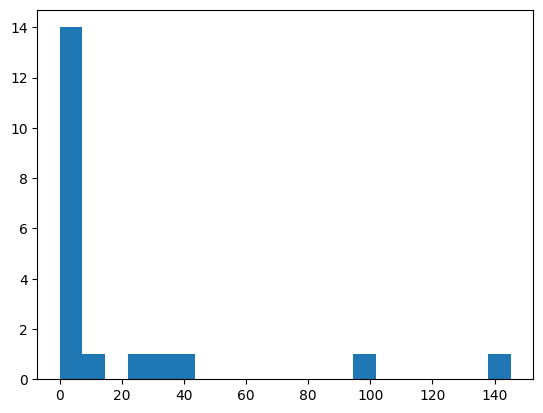

In [71]:
# QLogUniform Example
min_value, max_value, q = 1e-5,150,.001
def qloguniform(min_val, max_val, q, num_samples=50):
    # Paso 1: valores logarítmicos uniformes
    log_min, log_max = np.log(min_val), np.log(max_val)
    log_samples = np.random.uniform(log_min, log_max, num_samples)
    
    # Paso 2: volver al espacio original
    samples = np.exp(log_samples)
    
    # Paso 3: aplicar cuantización
    quantized = np.round(samples / q) * q
    return quantized

values = qloguniform(min_value, max_value, q)
print(values)
plt.hist(values, bins=20)
plt.show()

In [37]:
%%writefile ./zunkuaz/utilities/text_prep.py

from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from utilities.text_utils import re_breakline, re_dates, re_hiperlinks, re_money, re_negation, re_numbers, \
    re_special_chars, re_whitespaces, ApplyRegex, StemmingProcess, StopWordsRemoval
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Function that apply Regular Expressions, stopwords and other techniques to comments reviews
def text_transformers():
    # Defining regex transformers to be applied
    regex_transformers = {
        'break_line': re_breakline,
        'hiperlinks': re_hiperlinks,
        'dates': re_dates,
        'money': re_money,
        'numbers': re_numbers,
        'negation': re_negation,
        'special_chars': re_special_chars,
        'whitespaces': re_whitespaces
    }

    # Building a text prep pipeline
    text_prep_pipeline = Pipeline([
        ('regex', ApplyRegex(regex_transformers)),
        ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
        ('stemming', StemmingProcess(RSLPStemmer())),
        ('vectorizer', TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=stopwords.words('portuguese')))
    ])

    #X_prep = text_prep_pipeline.fit_transform(text_list)
    return text_prep_pipeline

Overwriting ./zunkuaz/utilities/text_prep.py


In [9]:
from azure.ai.ml.dsl import pipeline
from azure.ai.ml.sweep import SweepJob, Objective, Choice, QUniform
from azure.ai.ml.sweep import MedianStoppingPolicy

# Creating e2e pipeline
@pipeline()
def sentiment_analysis(pipeline_job_input):

    # Step 1: Cleaning data

    prep_data_component = ml_client.components.get('prep_data', version='2.8')
    clean_data = prep_data_component(input_data=pipeline_job_input)


###############################################################################


    # Step 2: Training and validating model with a sweep job

    train_component = ml_client.components.get('train_model', version='6.5')

    # Sweep job grid
    sweep_job = train_component(
        training_data=clean_data.outputs.output_data,
        reg_rate = QUniform(1,150,1),
        penalty = Choice(values=['l1','l2']),
        class_weight = Choice(values=["balanced","Nini"])
    )
     
    # Configuration sweep job
    sweep_job = sweep_job.sweep(
        primary_metric='f1_score',
        sampling_algorithm='random',
        goal='maximize',
        compute='zunku-comp-instance'
    )

    sweep_job.set_limits(
        max_total_trials=2, timeout=7200
    )

    sweep_job.early_termination = MedianStoppingPolicy(
        evaluation_interval=1, 
        delay_evaluation=3 
    )


####################################################################################################


    # Step 3: Training sentiment classifier 

    sentiment_classifier_component = ml_client.components.get('sentiment_classifier', version='2.4')
    sentiment_classifier = sentiment_classifier_component(
        training_data = clean_data.outputs.output_data,
        model_input = sweep_job.outputs.model_output
    )


###################################################################################################

    # Pipeline returns
    return{
        #'pipeline_job_transformed_data': clean_data.outputs.output_data,
        #'pipeline_job_trained_model' : sweep_job.outputs.model_output
        'pipeline_job_sentiment_classifier' : sentiment_classifier.outputs.model_output
    }


###################################################################################################


# Runing pipeline
pipeline_job = sentiment_analysis(Input(type=AssetTypes.URI_FILE, path='azureml:olist_order_reviews:1'))

# Changing pipeline job parameters

# Changing output mode
pipeline_job.outputs.pipeline_job_sentiment_classifier.mode = 'rw_mount'

pipeline_job.settings.default_compute = 'zunku-comp-instance'

pipeline_job.settings.default_datastore = 'workspaceblobstore'
print(pipeline_job)

pipeline_job = ml_client.jobs.create_or_update(
    pipeline_job, experiment_name='pipeline_job'
)

Class AutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class AutoDeleteConditionSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseAutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class IntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class ProtectionLevelSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseIntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
pathOnCompute is not a known attribute

display_name: sentiment_analysis
type: pipeline
inputs:
  pipeline_job_input:
    type: uri_file
    path: azureml:olist_order_reviews:1
outputs:
  pipeline_job_sentiment_classifier:
    mode: rw_mount
    type: uri_folder
jobs:
  clean_data:
    type: command
    inputs:
      input_data:
        path: ${{parent.inputs.pipeline_job_input}}
    resources:
      instance_count: 1
    component:
      $schema: https://azuremlschemas.azureedge.net/latest/commandComponent.schema.json
      name: prep_data
      version: '2.8'
      display_name: Prepare training data
      type: command
      inputs:
        input_data:
          type: uri_file
          optional: false
      outputs:
        output_data:
          type: uri_folder
      command: python src/prep-data.py --input_data ${{inputs.input_data}} --output_folder
        ${{outputs.output_data}}
      environment: azureml:/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourceGroups/brazilian-ecommerce-sentiment-analysis/provi

In [15]:
# Obtener los hijos (steps individuales)
childrens = list(ml_client.jobs.list(parent_job_name=pipeline_job.name))

# Por ejemplo, el primer hijo
for children in childrens:
    print(children.name)

bc30aff2-55eb-4b92-a24e-1ca3632e4539
b6e9dabf-fc7e-4e5a-9b25-4ea020095ad0
64164134-2f1c-42b5-b50d-ad027006e294


In [10]:
# Print available outputs
print(pipeline_job.outputs)

# Getting pipeline job name
pipeline_job = ml_client.jobs.get(pipeline_job.name)

output_port_name = pipeline_job.outputs['pipeline_job_sentiment_classifier'].port_name
# Download all the outputs of the job
# output = ml_client.jobs.download(name=pipeline_job.name, download_path=tmp_path, all=True)

# Download specific output
tmp_path = './zunkuaz/tmp'
output = ml_client.jobs.download(name=pipeline_job.name, download_path=tmp_path, output_name=output_port_name)

{'pipeline_job_sentiment_classifier': <azure.ai.ml.entities._job.pipeline._io.base.PipelineOutput object at 0x7befcc283d30>}


In [13]:
from azure.ai.ml.entities import Model

model = Model(
    path='./zunkuaz/tmp/named-outputs/pipeline_job_sentiment_classifier',
    type='mlflow_model',
    name='sentiment-classifier'
)

# registered_model = ml_client.models.create_or_update(model)

In [51]:
# Define and create and Online Endopoint
from azure.ai.ml.entities import ManagedOnlineEndpoint
import datetime

online_endpoint_name = "endpoint-" + datetime.datetime.now().strftime("%m%d%H%M%f")

# create an online endpoint
endpoint = ManagedOnlineEndpoint(
    name=online_endpoint_name,
    description="Online endpoint for MLflow sentiment classifier model",
    auth_mode="key",
)

ml_client.begin_create_or_update(endpoint).result()

ManagedOnlineEndpoint({'public_network_access': 'Enabled', 'provisioning_state': 'Succeeded', 'scoring_uri': 'https://endpoint-10301809734550.eastus.inference.ml.azure.com/score', 'openapi_uri': 'https://endpoint-10301809734550.eastus.inference.ml.azure.com/swagger.json', 'name': 'endpoint-10301809734550', 'description': 'Online endpoint for MLflow sentiment classifier model', 'tags': {}, 'properties': {'createdBy': 'Daniel Mendez', 'createdAt': '2025-10-30T18:09:51.775509+0000', 'lastModifiedAt': '2025-10-30T18:09:51.775509+0000', 'azureml.onlineendpointid': '/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourcegroups/brazilian-ecommerce-sentiment-analysis/providers/microsoft.machinelearningservices/workspaces/sentiment-analysis/onlineendpoints/endpoint-10301809734550', 'AzureAsyncOperationUri': 'https://management.azure.com/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/providers/Microsoft.MachineLearningServices/locations/eastus/mfeOperationsStatus/oeidp:280e7043-048d-45b

In [14]:
from azure.ai.ml.entities import Model, ManagedOnlineDeployment
from azure.ai.ml.constants import AssetTypes

# create a blue deployment
online_endpoint_name = 'endpoint-10301809734550'
blue_deployment = ManagedOnlineDeployment(
    name="blue",
    endpoint_name=online_endpoint_name,
    model=model,
    instance_type="Standard_D2as_v4",
    instance_count=1,
)

ml_client.online_deployments.begin_create_or_update(blue_deployment).result()

Check: endpoint endpoint-10301809734550 exists
Uploading pipeline_job_sentiment_classifier (0.01 MBs): 100%|██████████| 5792/5792 [00:00<00:00, 104795.18it/s]




.......................................

In [59]:
from azure.ai.ml.entities import Model, ManagedOnlineDeployment, CodeConfiguration
from azure.ai.ml.constants import AssetTypes

# create a local online endpoint
blue_deployment = ManagedOnlineDeployment(
    name="blue",
    endpoint_name=online_endpoint_name,
    model=model,
    environment=my_env,
    code_configuration= CodeConfiguration(
        code='./zunkuaz/src',
        scoring_script='sentiment-classifier.py'
    ),
    instance_type="Standard_D2as_v4",
    instance_count=1,
)

ml_client.online_deployments.begin_create_or_update(blue_deployment, local=True, vscode_debug=True).result()

Creating local deployment (endpoint-10301809734550 / blue) .
Building Docker image from Dockerfile
Step 1/7 : FROM mcr.microsoft.com/azureml/curated/minimal-py311-inference:36
 ---> 559c34e765b2
Step 2/7 : RUN mkdir -p /var/azureml-app/
 ---> Using cache
 ---> 03ff591c6f12
Step 3/7 : WORKDIR /var/azureml-app/
 ---> Running in 3ae5505b261b
 ---> 110e6738246d
Step 4/7 : COPY conda.yml /var/azureml-app/
. ---> f7e99c99730a
Step 5/7 : RUN conda env create -n inf-conda-env --file conda.yml
 ---> Running in 62f1f81f75f2
Retrieving notices: done
Channels:
 - defaults
Platform: linux-64
Solving environment: done

python-3.11.14       | 29.8 MB   |            |   0% 

libstdcxx-ng-11.2.0  | 4.7 MB    |            |   0% 









setuptools-80.9.0    | 1.9 MB    |            |   0% 











sqlite-3.50.2        | 1.1 MB    |            |   0% 















xorg-libx11-1.8.12   | 895 KB    |            |   0% 










































libgomp-11.2.0       | 474 KB    |     

APIError: 500 Server Error for http+docker://localhost/v1.43/containers/create?name=endpoint-10301809734550.blue: Internal Server Error ("invalid volume specification: '/mnt/batch/tasks/shared/LS_root/mounts/clusters/zunku-comp-instance/code/Users/azureml:/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourcegroups/brazilian-ecommerce-sentiment-analysis/workspaces/sentiment-analysis/datastores/workspaceblobstore/paths/LocalUpload/9f085b74e59e1f12b8dd911b365c4d3b0ab8ffe94d65ef1b49e9fb6fc8490f5c:/var/azureml-app/azureml-models//sentiment-classifier/1:z'")

In [53]:
# blue deployment takes 100 traffic
endpoint.traffic = {"blue": 100}
ml_client.begin_create_or_update(endpoint).result()

ManagedOnlineEndpoint({'public_network_access': 'Enabled', 'provisioning_state': 'Succeeded', 'scoring_uri': 'https://endpoint-10301809734550.eastus.inference.ml.azure.com/score', 'openapi_uri': 'https://endpoint-10301809734550.eastus.inference.ml.azure.com/swagger.json', 'name': 'endpoint-10301809734550', 'description': 'Online endpoint for MLflow sentiment classifier model', 'tags': {}, 'properties': {'createdBy': 'Daniel Mendez', 'createdAt': '2025-10-30T18:09:51.775509+0000', 'lastModifiedAt': '2025-10-30T18:38:50.555314+0000', 'azureml.onlineendpointid': '/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/resourcegroups/brazilian-ecommerce-sentiment-analysis/providers/microsoft.machinelearningservices/workspaces/sentiment-analysis/onlineendpoints/endpoint-10301809734550', 'AzureAsyncOperationUri': 'https://management.azure.com/subscriptions/a4fd359b-aa4a-4e0c-a8b2-338ed69a1d51/providers/Microsoft.MachineLearningServices/locations/eastus/mfeOperationsStatus/oeidp:280e7043-048d-45b

In [ ]:
# test the blue deployment with some sample data
response = ml_client.online_endpoints.invoke(
    endpoint_name=online_endpoint_name,
    deployment_name="blue",
    request_file="sample-data.json",
)

if response[1]=='1':
    print("Diabetic")
else:
    print ("Not diabetic")